Rotation, translation and skew are useful operations for matching, tracking, and data augmentation.

In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

a) Write a function that takes as input an image I, rotates it by an angle θ1 and horizontally skews it by
an angle, θ2. Write the matrix formulation for image rotation R(.) and skewing S(.). Define all the
variables. Note that the origin of the coordinate system of the programming environment you use
might be different from the one shown in the lectures

In [2]:
#Function for image rotation and skewing
def ICV_rotation_skewing(img, rotation_angle, skewing_angle):
    #getting image height and width
    original_img_height = img.shape[0]
    original_img_width = img.shape[1]
    
    #converting angle from degree to radians to make it possible to relate to linear measure and angle measures
    rotation_angle = math.radians(rotation_angle)
    skewing_angle = math.radians(skewing_angle)
    
    #finding centre of original image to perform rotation and skewing w.r.t to centre
    original_centre_height = original_img_height//2
    original_centre_width = original_img_width//2
    
    
    #creating empty image to store rotated image dimensions same as original image
    rotated_img = np.zeros([original_img_height,original_img_width,3],dtype=np.uint8)
    
    #creating empty image to store store final rotated and skewed image dimensions same as original image
    final_img = np.zeros([original_img_height,original_img_width,3],dtype=np.uint8)
    
    ###ROTATION CODE
    
    #Iteration over every pixel in original image
    for i in range(original_img_height):
        for j in range(original_img_width):
            
            #input matrix
            multiple_matrix = np.array([original_img_height-i-original_centre_height,original_img_width-j-original_centre_width])
            
            #centre co-ordinates matrix for making operation wrt to centre
            #centre_coordinate_matrix = np.array([-original_centre_height,-original_centre_width])
            
            #clockwise rotation matrix 
            function_matrix = np.array([[math.cos(rotation_angle), math.sin(rotation_angle)],   
                                        [-math.sin(rotation_angle), math.cos(rotation_angle)]])
            
            #perfroming rotation
            new_cordinates = function_matrix @ multiple_matrix #- centre_coordinate_matrix
            new_x = int(new_cordinates[0])
            new_y = int(new_cordinates[1])
        
            #Adjusting co-ordinates with respect to centre
            new_x = int(abs( original_centre_height - new_x))
            new_y = int(abs( original_centre_width - new_y))
            
            #To avoid index out of bound error updating co-ordinates
            try:
                #updating new co-ordinates
                rotated_img[new_x, new_y, :] = img[i,j,:]
            except:
                pass
            
            
            
    ###Skewing code

    #Iteration over every pixel in original image
    for i in range(original_img_height):
        for j in range(original_img_width):
            
            #input matrix
            multiple_matrix = np.array([i,j])
            
            #skewing matrix
            skewing_matrix = np.array([[1, math.tan(skewing_angle/2)],
                                     [0, 1]])
            
            
            #performing skewing
            new_cordinates = skewing_matrix @ multiple_matrix 
            new_x = int(new_cordinates[0])
            new_y = int(new_cordinates[1])
        
            
            #To avoid index out of bound error updating co-ordinates
            try:
                #updating new co-ordinates
                final_img[new_x, new_y, :] = rotated_img[i,j,:]
            except:
                pass
            
           
    return final_img #returning transformed image
            
    
    

b) Create an image that contains your name written in Arial, point 72, capital letters. Rotate clockwise
the image you created by 30, 60, 120 and -50 degrees. Skew the same image by 10, 40 and 60
degrees. Complete the process so that all the pixels have a value. Discuss in the report the
advantages and disadvantages of different approaches

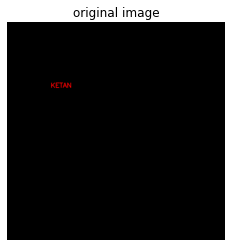

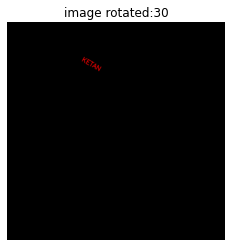

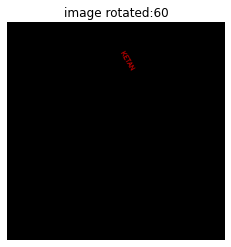

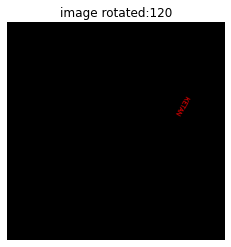

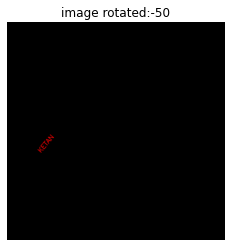

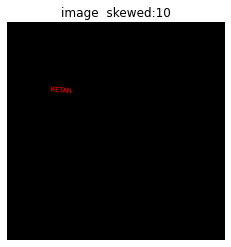

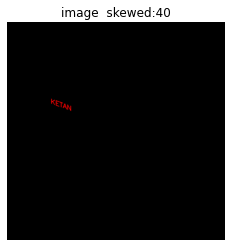

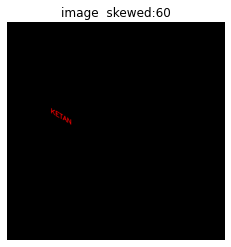

In [3]:
#creating empty image containing name
#name_image = cv2.imread('ques_1.jpg')
#name_image = np.zeros([1000,1000,3],dtype=np.uint8)
name_image = np.zeros([1000,1000,3],dtype=np.uint8)

# fontScale
fontScale = 1

#font type
font = cv2.FONT_HERSHEY_SIMPLEX
   
# Red color in RGB
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2
   
# Using cv2.putText() method
name_image = cv2.putText(name_image, 'KETAN', (200,300), font, fontScale, color, thickness, cv2.LINE_AA)

# showing original image
plt.imshow(name_image)
plt.axis('off')
plt.title("original image")
plt.show()

for i in [30, 60, 120, -50]: #angle of rotation
    rotated_skewed_img = ICV_rotation_skewing(name_image, i, 0) #calling rotation and skewing function
    img_name_string = "image rotated:"+str(i) #creating outpur string
        
    # showing Transformed image
    plt.imshow(rotated_skewed_img)
    plt.axis('off')
    plt.title(img_name_string)
    plt.show(block=False)
        
for j in [10, 40, 60]: #angle of skewing
    rotated_skewed_img = ICV_rotation_skewing(name_image, 0, j) #calling rotation and skewing function
    img_name_string = "image  skewed:"+str(j) #creating outpur string
        
    # showing Transformed image
    plt.imshow(rotated_skewed_img)
    plt.axis('off')
    plt.title(img_name_string)
    plt.show(block=False)


c) Analyse the results when you change the order of the two operators: R(S(I)) and S(R(I)).
i) Rotate the image by θ1 = 20 clockwise and then skew the result by θ2 = 50.
ii) Skew the image by θ2 = 50 and then rotate the result by θ1 = 20 clockwise.
Are the results of (i) and (ii) the same? Why?

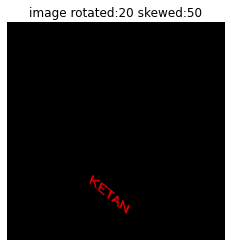

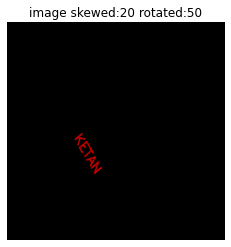

In [34]:
#1
#rotating image by 20 degree clockwise and skewing 50 degree
rotated_skewed_img = ICV_rotation_skewing(ICV_rotation_skewing(name_image, 20,0), 0, 50) #calling rotation and skewing function
img_name_string = "image rotated:20 skewed:50" #creating outpur string
plt.imshow(rotated_skewed_img)
plt.axis('off')
plt.title(img_name_string)
plt.show()


#2
#skewing image by 20 degree and rotating 50 degree
rotated_skewed_img = ICV_rotation_skewing(ICV_rotation_skewing(name_image, 0, 20), 50, 0) #calling rotation and skewing function
img_name_string = "image skewed:20 rotated:50" #creating output string
plt.imshow(rotated_skewed_img)
plt.axis('off')
plt.title(img_name_string)
plt.show()